In [50]:
from sklearn.datasets import fetch_covtype
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5 

In [52]:
frame = fetch_covtype(as_frame=True)
stacked_frame = np.hstack((frame.data, frame.target.values.reshape(-1, 1)))
df = pd.DataFrame(data=stacked_frame, columns=frame.feature_names + ['Label'])
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Label
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [53]:
print(df.isnull().sum())
print('Duplicates:', df.duplicated().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


2.051470537613681


<Axes: >

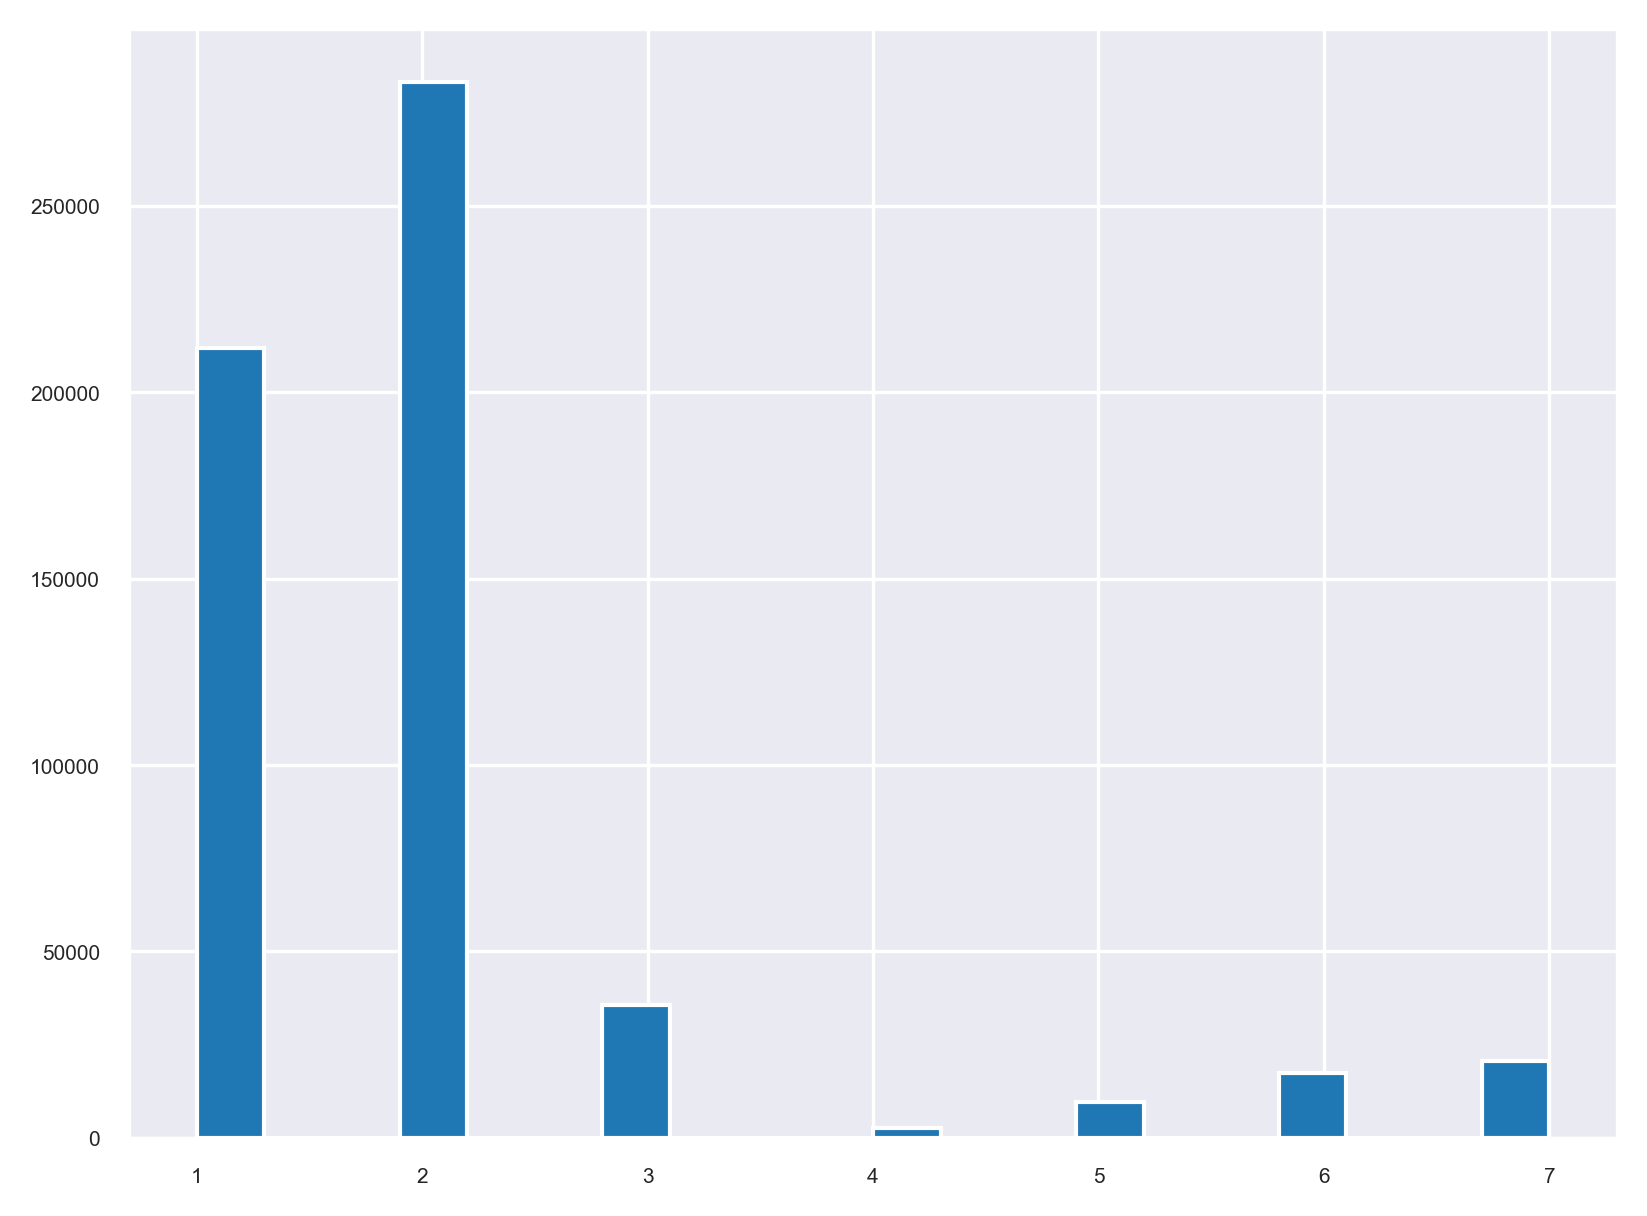

In [54]:
print(df['Label'].mean())
df['Label'].hist(bins=20)

In [55]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Label
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [56]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label'].astype(np.int8) - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<Axes: >

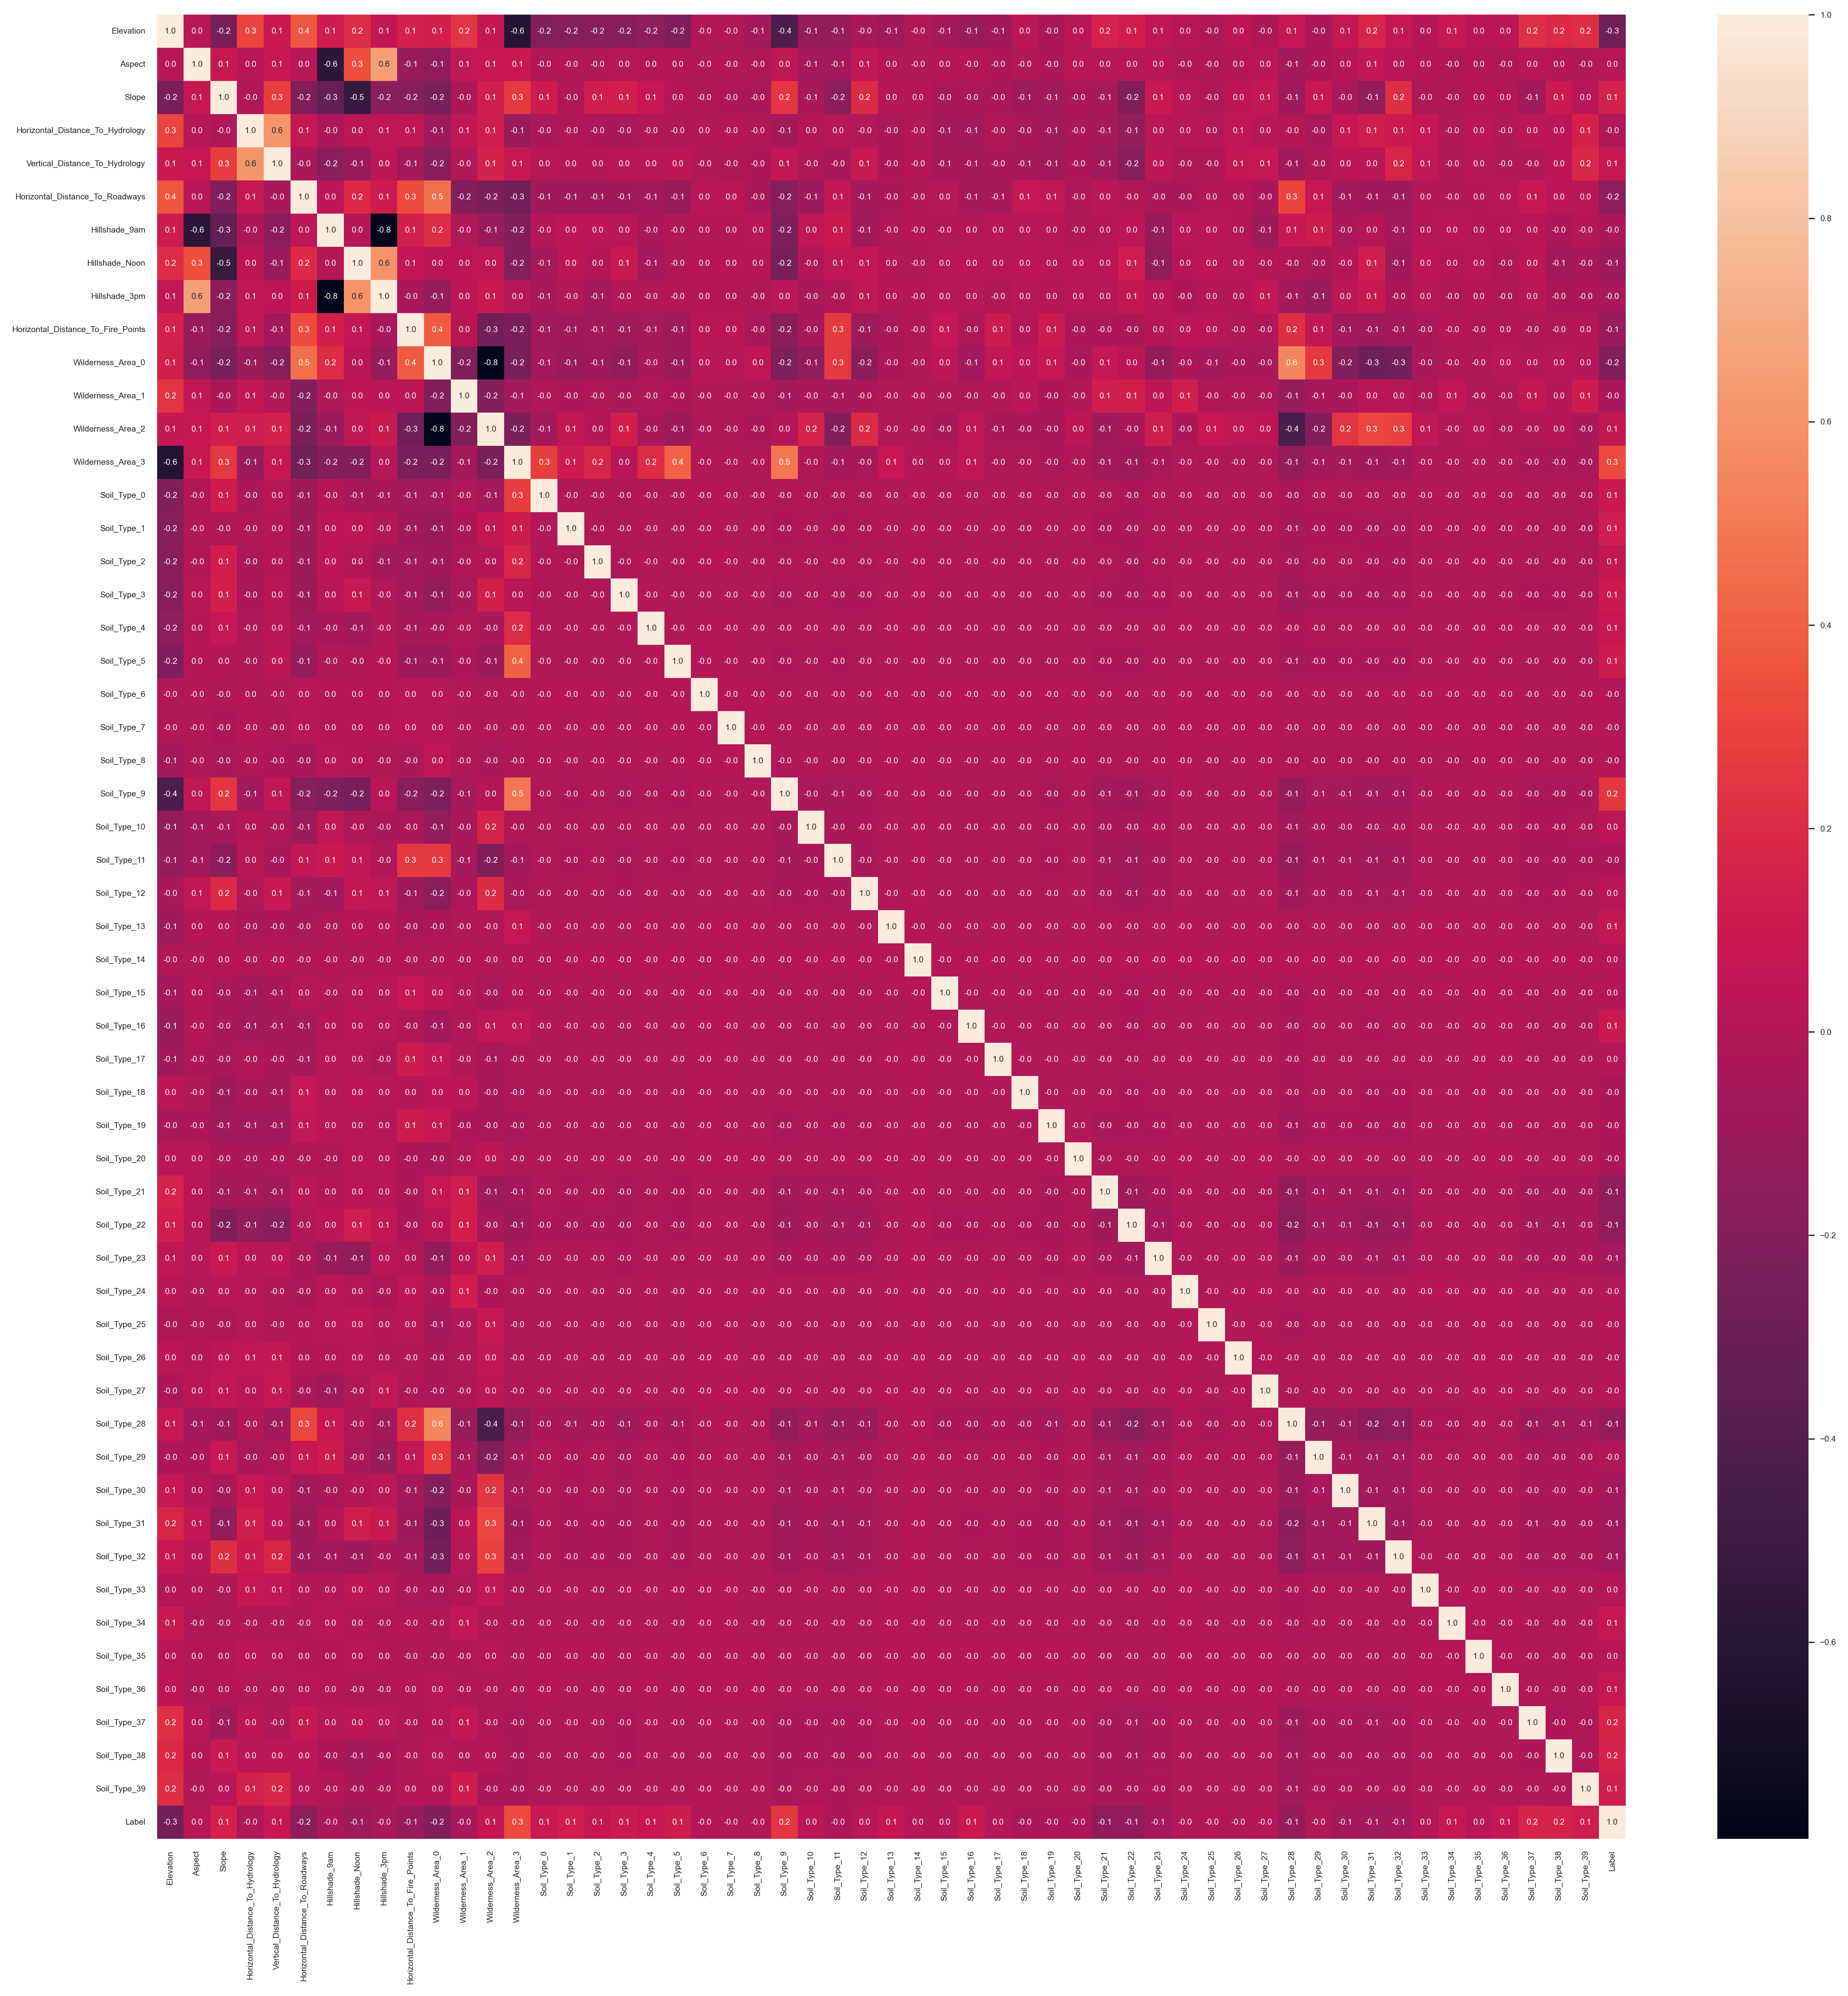

In [57]:
import seaborn as sns

correlation = df.corr()

fig = plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, fmt='0.1f')

In [58]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

def pearson_correlation(x, y):
    scores = []
    pvalues = []
    for i in range(x.shape[1]):
        score, pvalue = pearsonr(x[:, i], y)
        scores.append(score)
        pvalues.append(pvalue)
    return scores, pvalues

best_selector = SelectKBest(score_func=pearson_correlation, k=10)
best_selector.fit(X, y)

features_mask = best_selector.get_feature_names_out()
print(features_mask)

['Slope' 'Wilderness_Area_3' 'Soil_Type_0' 'Soil_Type_1' 'Soil_Type_3'
 'Soil_Type_5' 'Soil_Type_9' 'Soil_Type_37' 'Soil_Type_38' 'Soil_Type_39']


In [59]:
def hist_maker(df, columns, max_rows, max_cols):
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols)

    colors = ['blue', 'red', 'green', 'yellow', 'black', 'orange', 'brown', 'pink', 'purple']
    for i, col in enumerate(columns):
        cur_row = i // max_cols
        cur_col = i % max_cols
        
        rand_number = np.random.randint(0, len(colors))
        
        df[col].hist(ax=axes[cur_row, cur_col], color=colors[rand_number], bins=30)
        axes[cur_row, cur_col].set_title(col)
        plt.tight_layout()

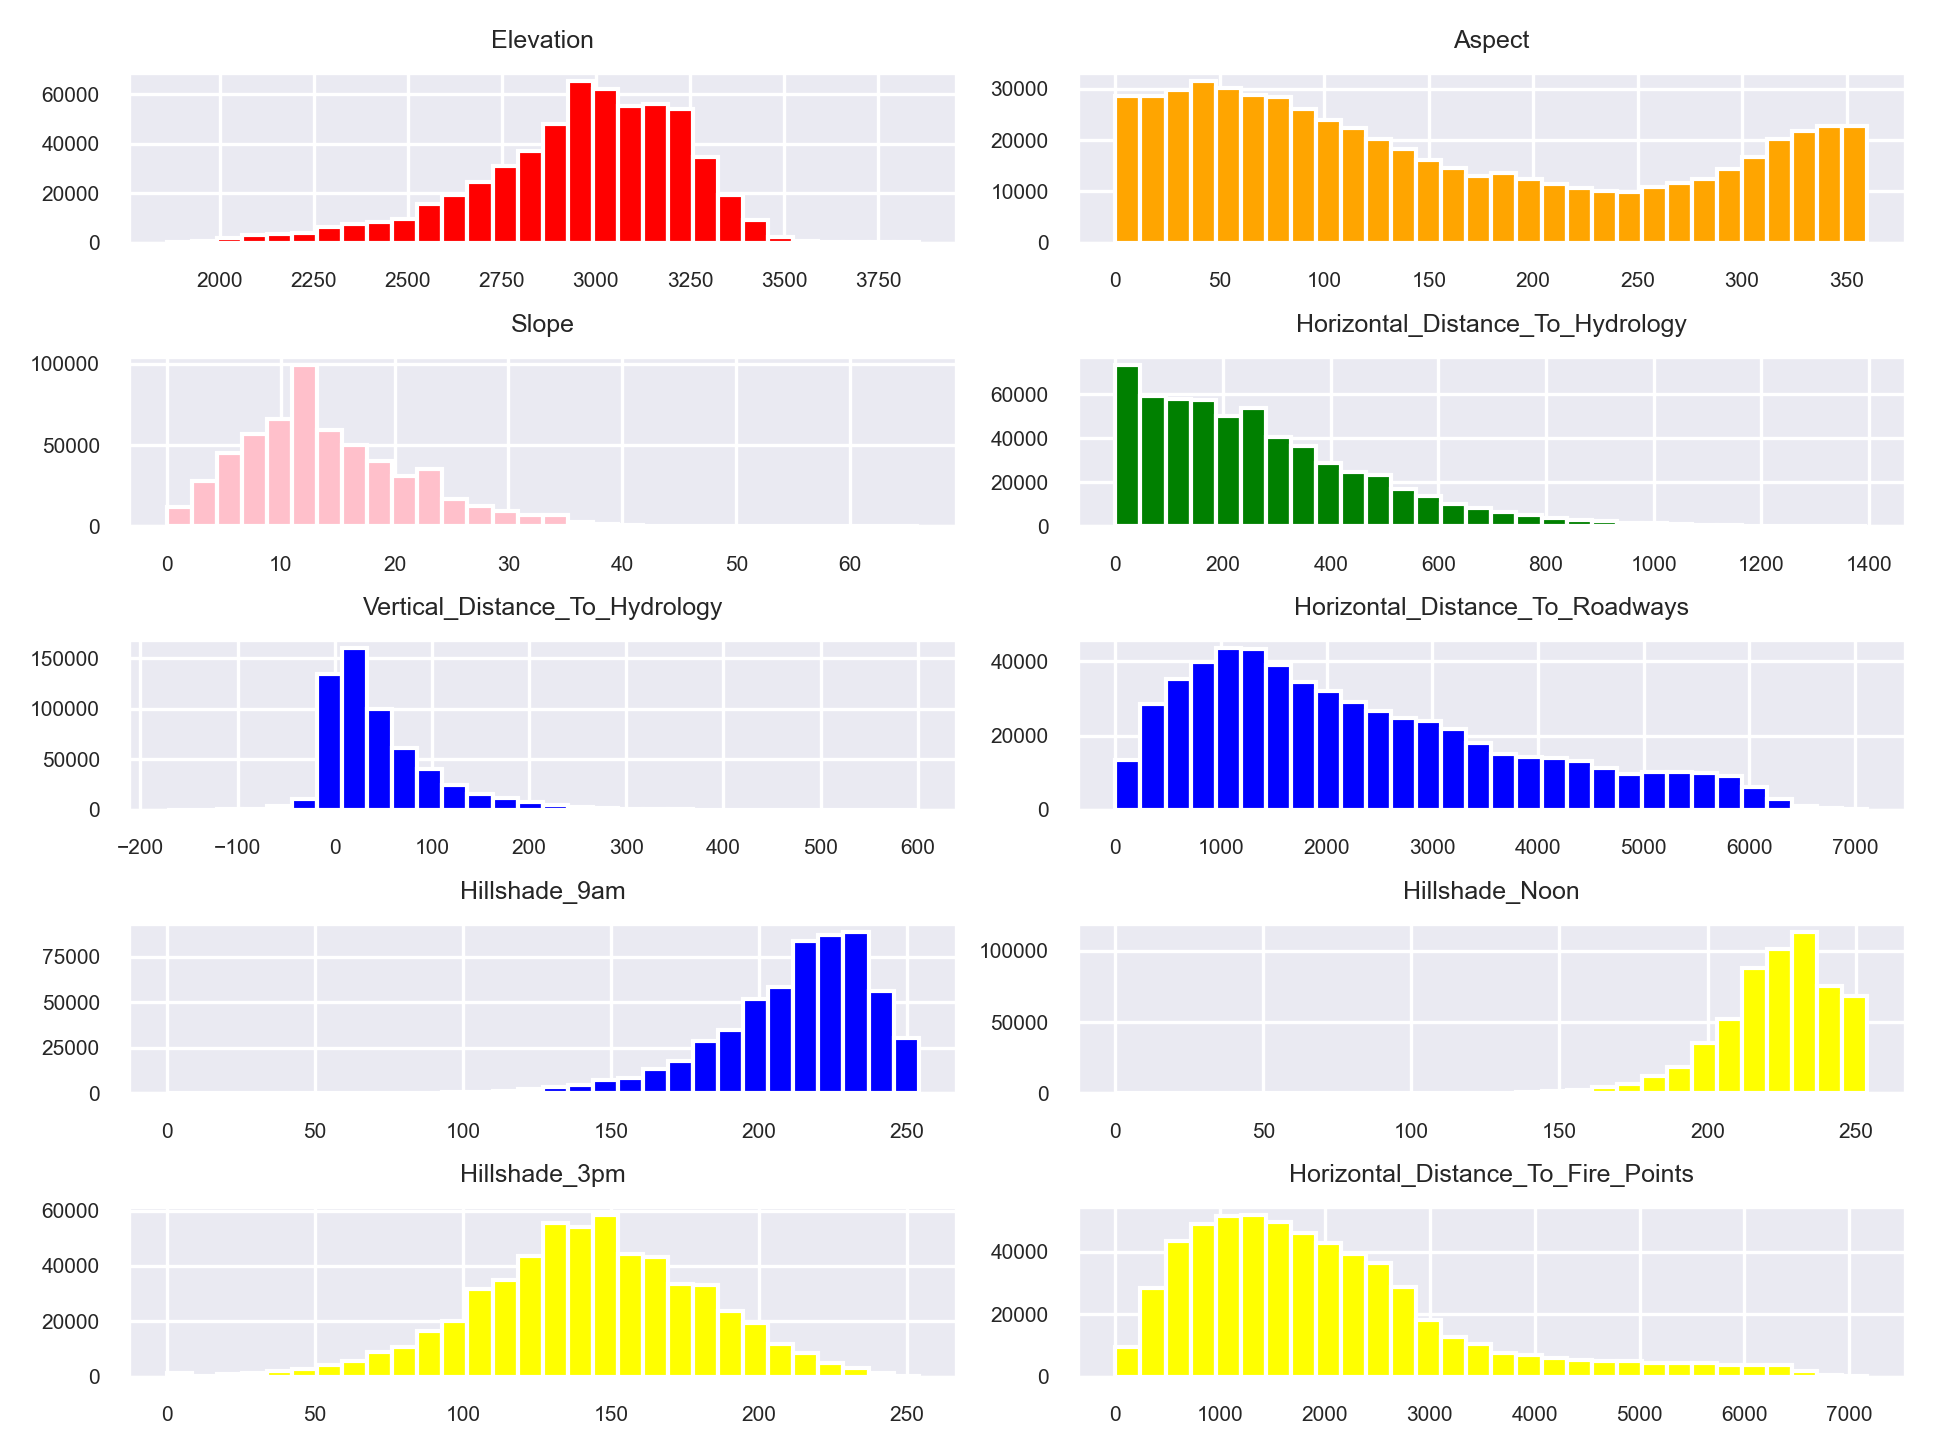

In [60]:
columns = df.columns[:10].tolist()
hist_maker(df=df, columns=columns, max_rows=5, max_cols=2)

In [61]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

transformer = PowerTransformer(method='yeo-johnson', standardize=False)

col_transformer = ColumnTransformer(
    transformers=[('transformed', transformer, columns)],
    remainder='passthrough',
).set_output(transform='pandas')

X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

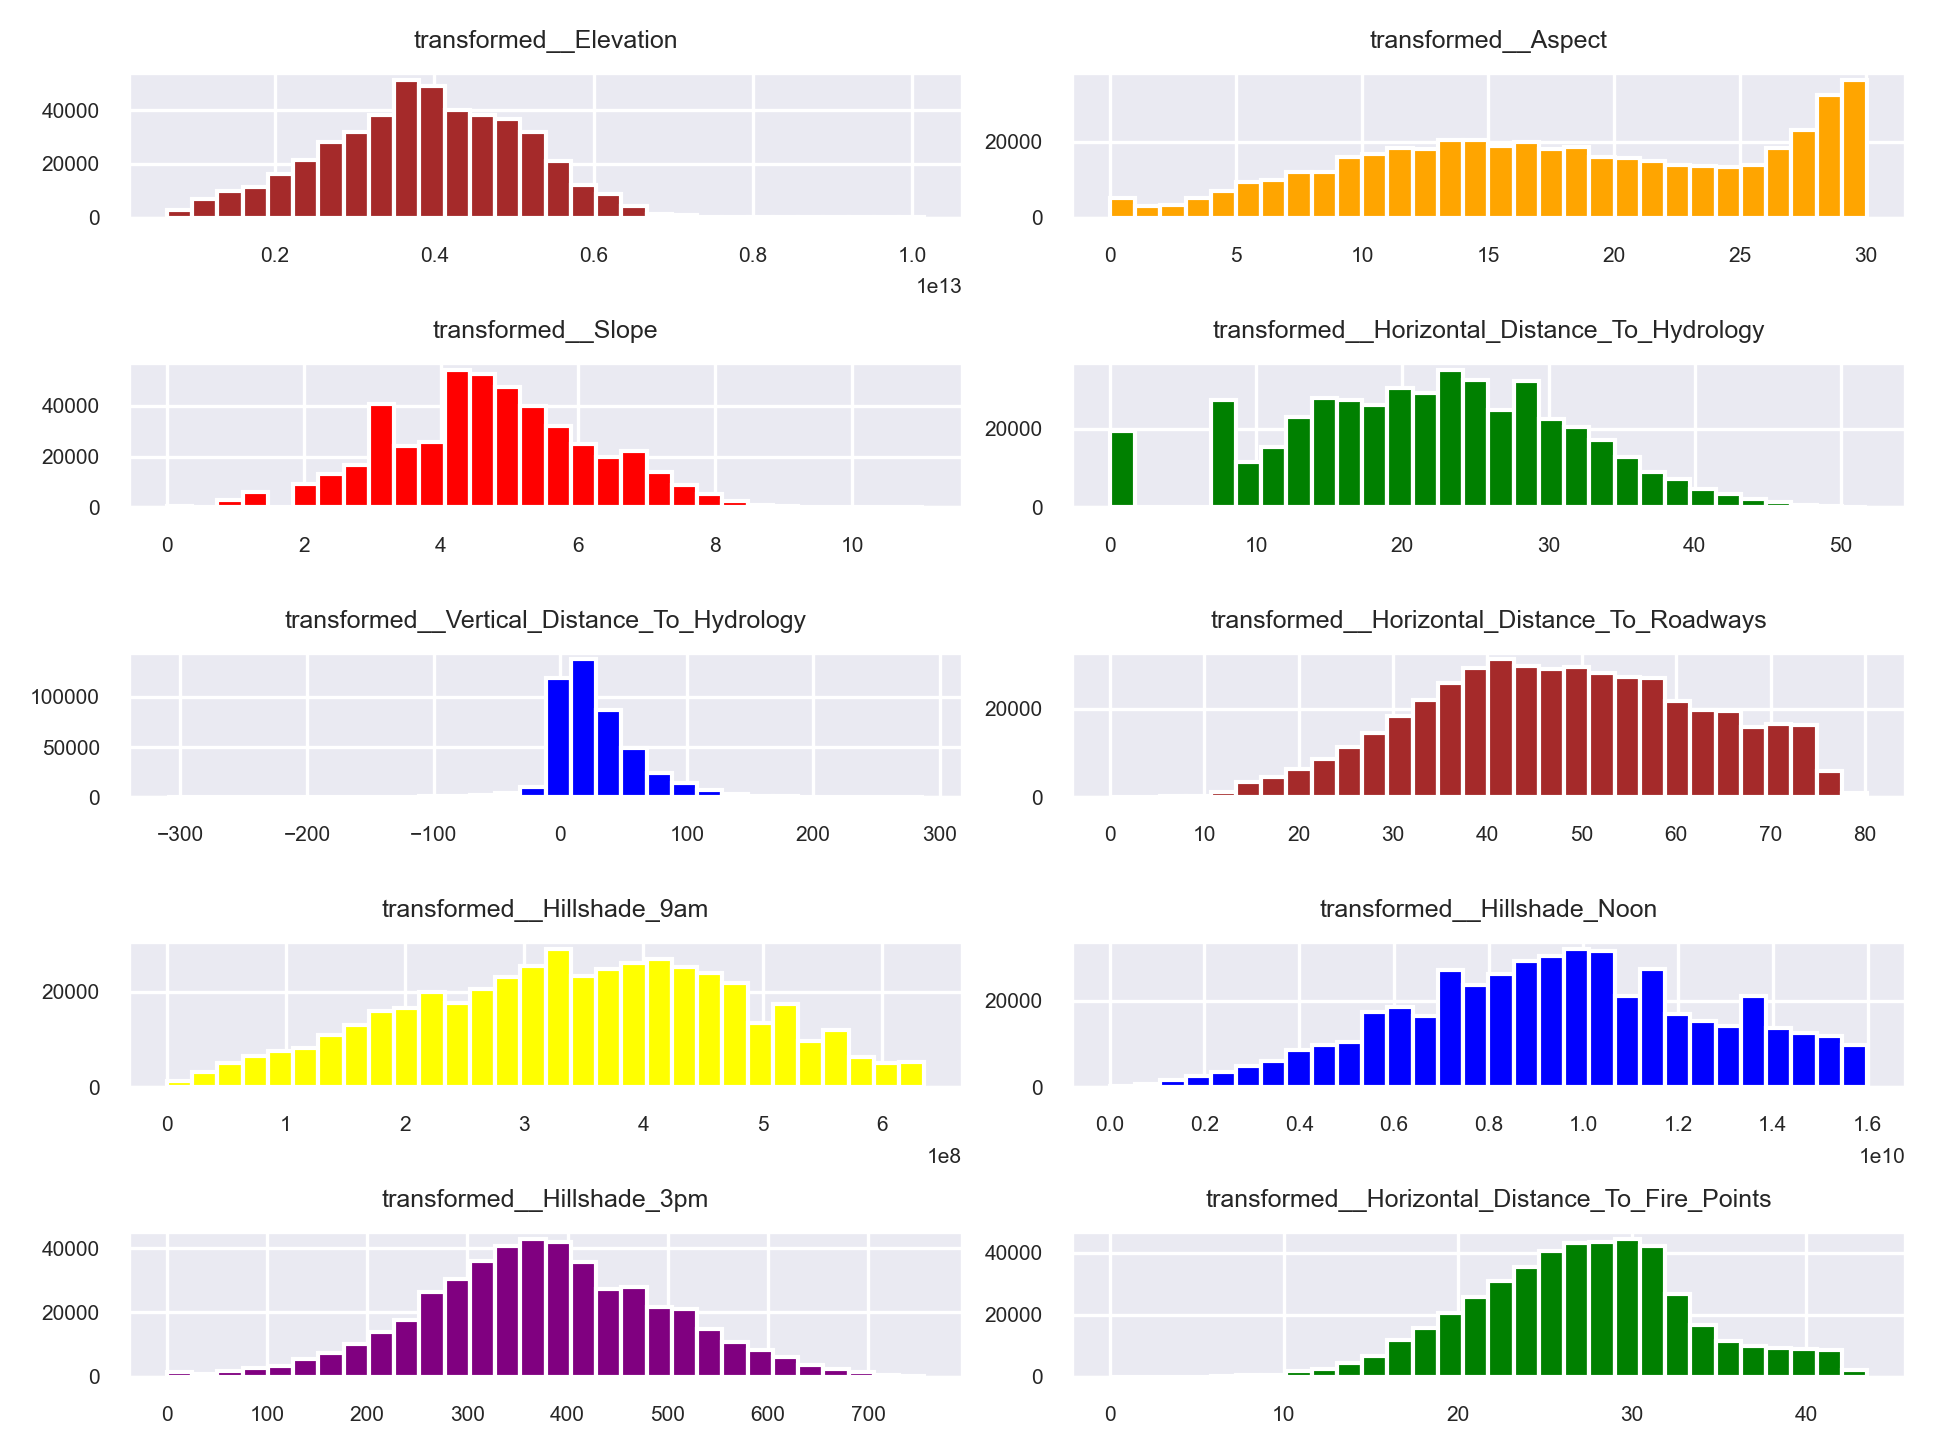

In [62]:
new_cols = X_train.columns[:10].tolist()
hist_maker(df=X_train, columns=new_cols, max_rows=5, max_cols=2)

In [63]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

discretiser = EqualFrequencyDiscretiser(q=10, variables=new_cols)
X_train = discretiser.fit_transform(X_train)
X_test = discretiser.transform(X_test)

X_train.head()

,transformed__Elevation,transformed__Aspect,transformed__Slope,transformed__Horizontal_Distance_To_Hydrology,transformed__Vertical_Distance_To_Hydrology,transformed__Horizontal_Distance_To_Roadways,transformed__Hillshade_9am,transformed__Hillshade_Noon,transformed__Hillshade_3pm,transformed__Horizontal_Distance_To_Fire_Points,...,remainder__Soil_Type_30,remainder__Soil_Type_31,remainder__Soil_Type_32,remainder__Soil_Type_33,remainder__Soil_Type_34,remainder__Soil_Type_35,remainder__Soil_Type_36,remainder__Soil_Type_37,remainder__Soil_Type_38,remainder__Soil_Type_39
279523,0,0,5,8,9,2,2,2,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562159,9,3,8,9,7,2,9,1,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83158,4,8,0,2,2,7,3,6,7,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57372,2,2,4,4,2,6,7,2,2,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452735,5,9,2,5,6,2,2,4,7,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from xgboost import XGBClassifier
from xgboost.plotting import plot_importance
import matplotlib.pyplot as plt
import shap

In [65]:
xgboost = XGBClassifier(random_state=42, device='cuda')
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

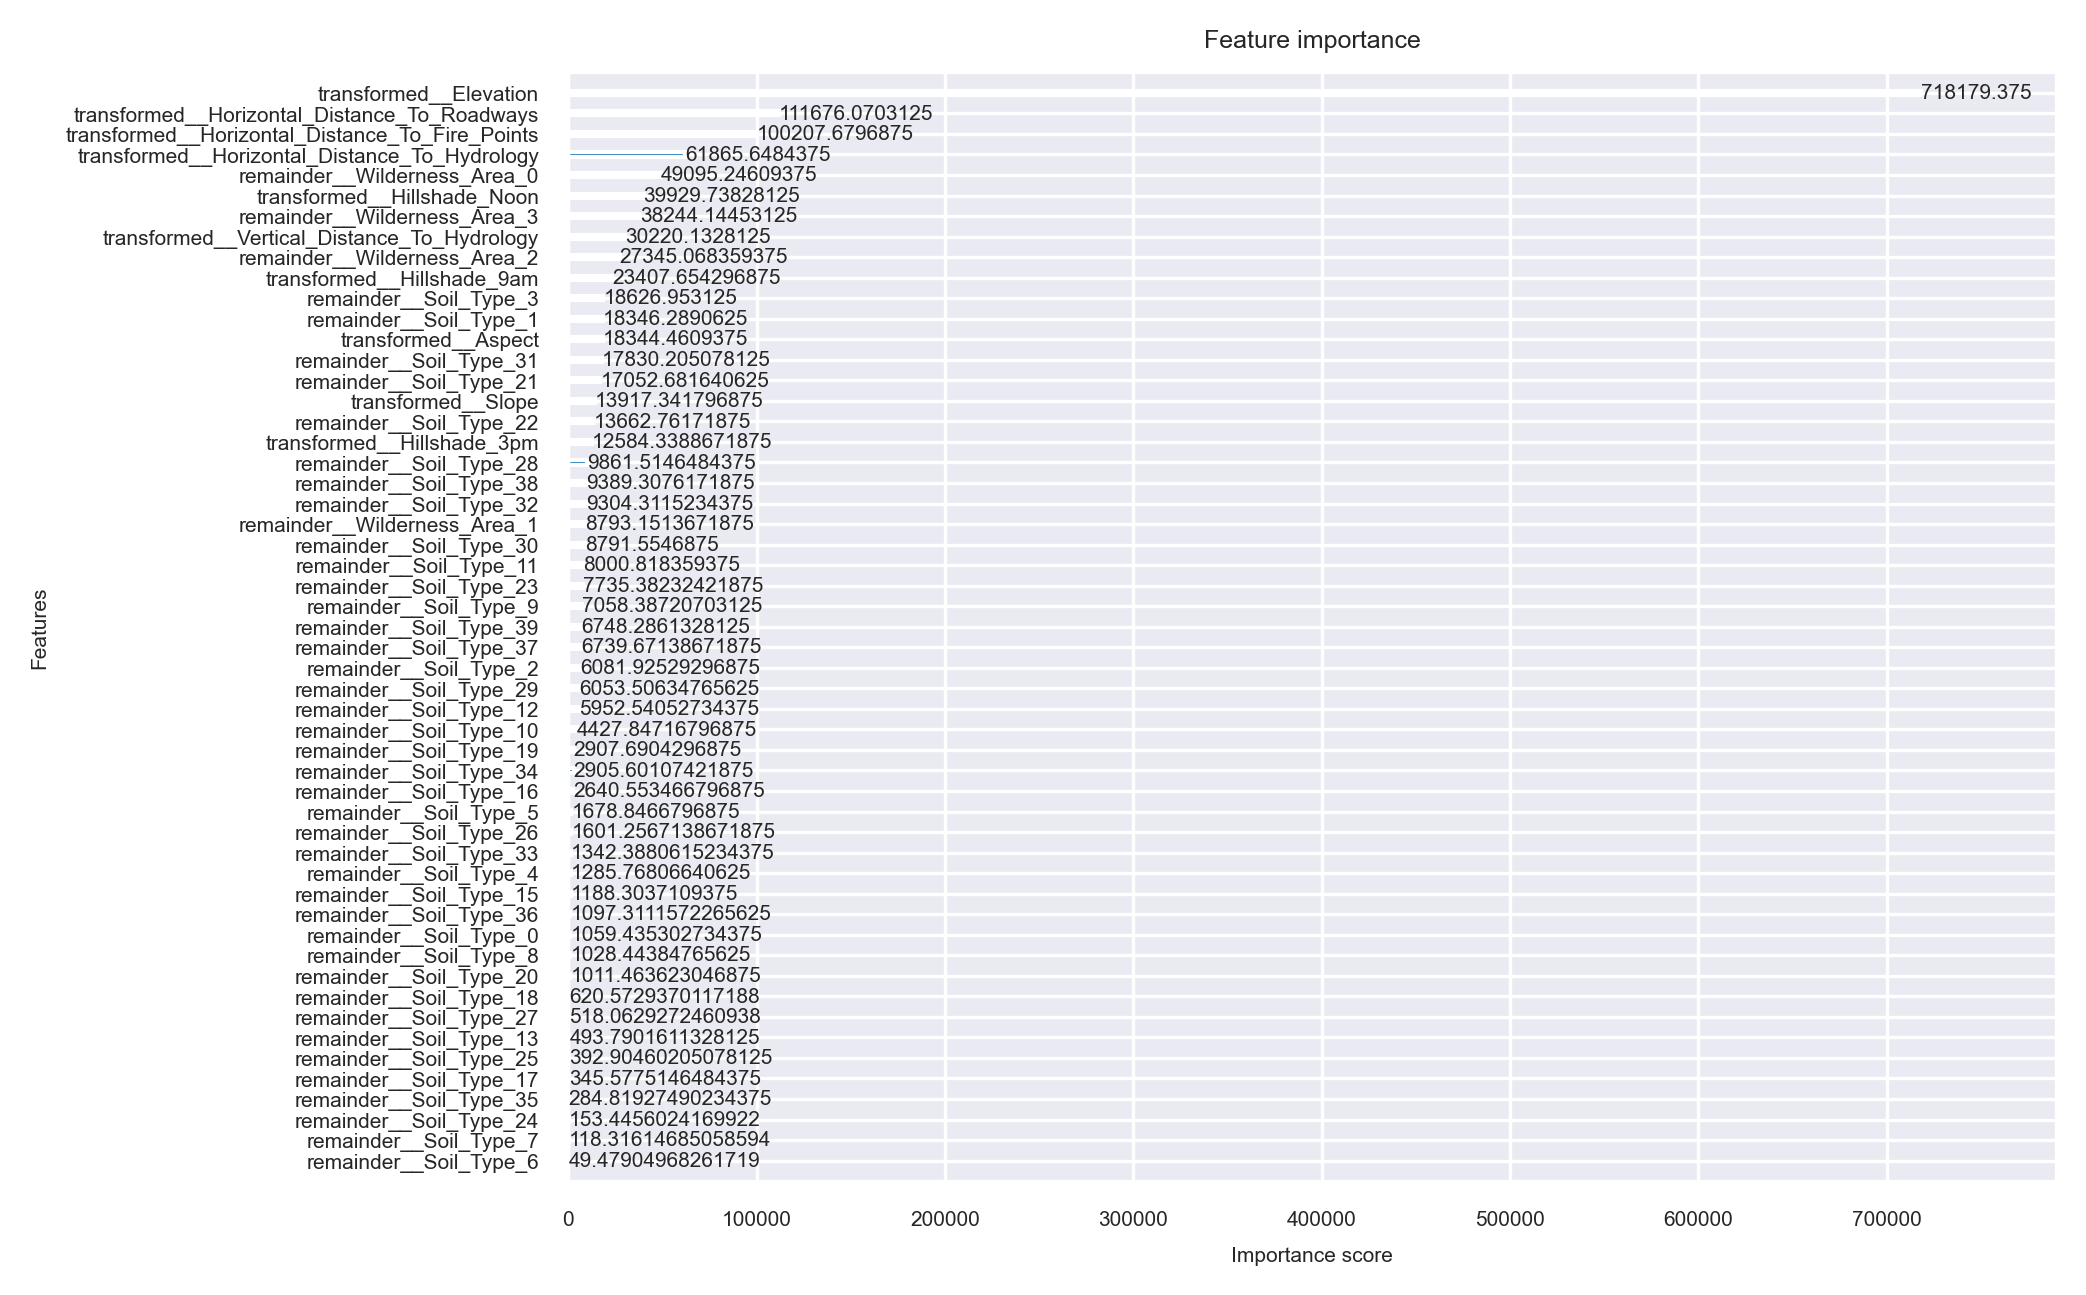

In [66]:
plot_importance(xgboost, importance_type='total_gain')

In [67]:
importance_dict = xgboost.get_booster().get_score(importance_type='total_gain')
features_name = importance_dict.keys()
importance_score = importance_dict.values()

importance_df = pd.DataFrame({
    'Features': features_name,
    'Importance': importance_score
}).sort_values('Importance', ascending=False).reset_index(drop=True)
importance_df

,Features,Importance
0,transformed__Elevation,718179.375000
1,transformed__Horizontal_Distance_To_Roadways,111676.070312
2,transformed__Horizontal_Distance_To_Fire_Points,100207.679688
3,transformed__Horizontal_Distance_To_Hydrology,61865.648438
4,remainder__Wilderness_Area_0,49095.246094
5,transformed__Hillshade_Noon,39929.738281
6,remainder__Wilderness_Area_3,38244.144531
7,transformed__Vertical_Distance_To_Hydrology,30220.132812
8,remainder__Wilderness_Area_2,27345.068359
9,transformed__Hillshade_9am,23407.654297


In [68]:
best_features = importance_df.loc[:30, 'Features'].tolist()
X_train = X_train.loc[:, best_features]
X_test = X_test.loc[:, best_features]

X_train

,transformed__Elevation,transformed__Horizontal_Distance_To_Roadways,transformed__Horizontal_Distance_To_Fire_Points,transformed__Horizontal_Distance_To_Hydrology,remainder__Wilderness_Area_0,transformed__Hillshade_Noon,remainder__Wilderness_Area_3,transformed__Vertical_Distance_To_Hydrology,remainder__Wilderness_Area_2,transformed__Hillshade_9am,...,remainder__Wilderness_Area_1,remainder__Soil_Type_30,remainder__Soil_Type_11,remainder__Soil_Type_23,remainder__Soil_Type_9,remainder__Soil_Type_39,remainder__Soil_Type_37,remainder__Soil_Type_2,remainder__Soil_Type_29,remainder__Soil_Type_12
279523,0,2,2,8,0.0,2,1.0,9,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562159,9,2,9,9,0.0,1,0.0,7,0.0,9,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
83158,4,7,9,2,1.0,6,0.0,2,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57372,2,6,9,4,1.0,2,0.0,2,0.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452735,5,2,3,5,0.0,4,0.0,6,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0,2,4,0,0.0,9,0.0,1,1.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152315,3,8,7,0,1.0,2,0.0,2,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,0,0,3,3,1.0,6,0.0,3,0.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435829,9,6,1,3,0.0,9,0.0,5,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report

xgboost = XGBClassifier(device='cuda',
                        random_state=42,
                        eval_metric='mlogloss', 
                        objective='multi:softmax', 
                        verbosity=1, 
                        early_stopping_rounds=10)

params = {
    'max_depth': np.arange(3, 10, 1),
    'n_estimators': np.arange(500, 1000, 100),
    'subsample': np.arange(0.5, 1, 0.1),
    'learning_rate': np.arange(0.3, 1, 0.1),
}

grid = RandomizedSearchCV(estimator=xgboost, param_distributions=params, cv=3, n_iter=10, random_state=42, scoring='f1_macro')
grid.fit(X_train, y_train, eval_set=[(X_test, y_test)])

print('Best Params:', grid.best_params_)
print('Best Score:', grid.best_score_)

xgboost_best_model = grid.best_estimator_

y_pred = xgboost_best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
classif_report = classification_report(y_test, y_pred)
print(f'f1 score: {f1} \n')
print(classif_report)

[0]	validation_0-mlogloss:0.86649
[1]	validation_0-mlogloss:0.70431
[2]	validation_0-mlogloss:0.63060
[3]	validation_0-mlogloss:0.58932
[4]	validation_0-mlogloss:0.55452
[5]	validation_0-mlogloss:0.52976
[6]	validation_0-mlogloss:0.51587
[7]	validation_0-mlogloss:0.50632
[8]	validation_0-mlogloss:0.49457
[9]	validation_0-mlogloss:0.48477
[10]	validation_0-mlogloss:0.47571
[11]	validation_0-mlogloss:0.46696
[12]	validation_0-mlogloss:0.45773
[13]	validation_0-mlogloss:0.45217
[14]	validation_0-mlogloss:0.44512
[15]	validation_0-mlogloss:0.43677
[16]	validation_0-mlogloss:0.42890
[17]	validation_0-mlogloss:0.42232
[18]	validation_0-mlogloss:0.41493
[19]	validation_0-mlogloss:0.40823
[20]	validation_0-mlogloss:0.40329
[21]	validation_0-mlogloss:0.39832
[22]	validation_0-mlogloss:0.39438
[23]	validation_0-mlogloss:0.38856
[24]	validation_0-mlogloss:0.38487
[25]	validation_0-mlogloss:0.38050
[26]	validation_0-mlogloss:0.37673
[27]	validation_0-mlogloss:0.37321
[28]	validation_0-mlogloss:0.3